Problem statement :

Done by:- Abhisek Keshari


Email Id:- 2018UME0126@iitjammu.ac.in


Batch:- March

**Objective**: To expose the best combination for strategy games available in the appstore in order to get a good user rating (4.0/5.0 and above)
To analyse the dataset, we will look at the relationship as below:

**Strategy**
* Genre grouping
* Game Size analysis
* Release date/ Update date factor
* Game Price and In-App Purchase Factor (Grouped by Genre)
* Age Rating Factor 

**Data Cleaning**
* Games without User Rating are dropped.
* Games with less than 200 user rating AND days since last update date <6month are dropped to prevent biased ratings from the developer
* Genre tags "Entertainment" and "Games" are removed from the Genre string as it does not provide meaningful insight
* The remaining of the string are checked and grouped as follows:
     1. Puzzle= Puzzle/Board
     2. Adventure= Adventure/Role/Role Playing
     3. Action = Action
     4. Family = Family/Education


In [1]:
#importing libraries

import pandas as pd
import datetime

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statistics

import warnings
warnings.filterwarnings('ignore')

In [2]:
gstat = pd.read_csv('appstore_games (5).csv')

gstat.head(5)

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [3]:
gstat.describe()

,ID,Average User Rating,User Rating Count,Price,Size
count,1.700700e+04,7561.000000,7.561000e+03,16983.000000,1.700600e+04
mean,1.059614e+09,4.060905,3.306531e+03,0.813419,1.157064e+08
std,2.999676e+08,0.751428,4.232256e+04,7.835732,2.036477e+08
min,2.849214e+08,1.000000,5.000000e+00,0.000000,5.132800e+04
25%,8.996543e+08,3.500000,1.200000e+01,0.000000,2.295014e+07
50%,1.112286e+09,4.500000,4.600000e+01,0.000000,5.676895e+07
75%,1.286983e+09,4.500000,3.090000e+02,0.000000,1.330271e+08
max,1.475077e+09,5.000000,3.032734e+06,179.990000,4.005591e+09


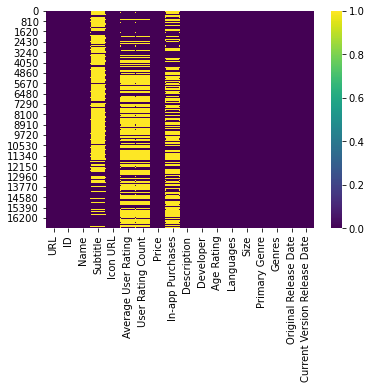

In [4]:
sns.heatmap(gstat.isnull(), cmap='viridis')


<BarContainer object of 18 artists>

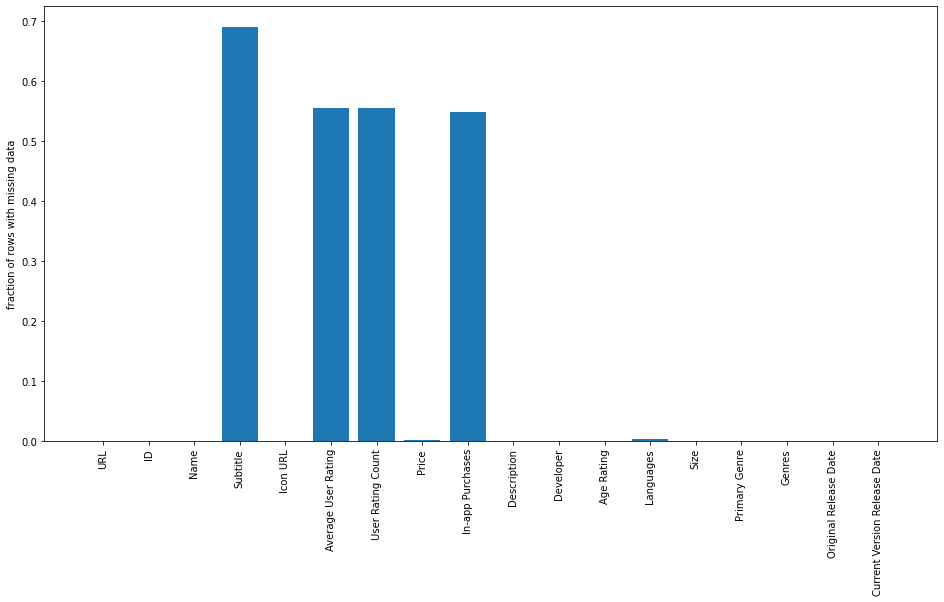

In [5]:
null_counts = gstat.isnull().sum()/len(gstat)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts)),null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

# Data Cleaning


In [6]:
gstatf=gstat.copy()

#we can't get useful information from this two fields
gstatf = gstatf.drop(columns="URL")
gstatf = gstatf.drop(columns="Icon URL")

gstatf.columns= ['ID', 'Name','Subtitle','User_Rating','User_Rating_Count',
                 'Price','In_App_Purchase','Desc','Dev','Age_Rating',
                 'Languages','Size','Primary_Genre','Genre','Release_Date',
                 'Current_Version_Date']

gstatf = gstatf[pd.notnull(gstatf['User_Rating'])]


gstatf['Release_Date'] = pd.to_datetime(gstatf['Release_Date'])
gstatf['Current_Version_Date'] = pd.to_datetime(gstatf['Current_Version_Date'])

gstatf['Update_gap']=gstatf.Current_Version_Date-gstatf.Release_Date # how occationally an app is released with new updates


Low_User_Count=(gstatf[gstatf.User_Rating_Count < 200].index) &\
gstatf[gstatf.Update_gap < datetime.timedelta(days=175)].index

gstatf.drop(Low_User_Count , inplace=True)


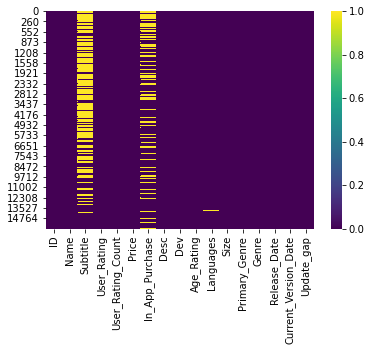

In [7]:
sns.heatmap(gstatf.isnull(), cmap='viridis')

<BarContainer object of 17 artists>

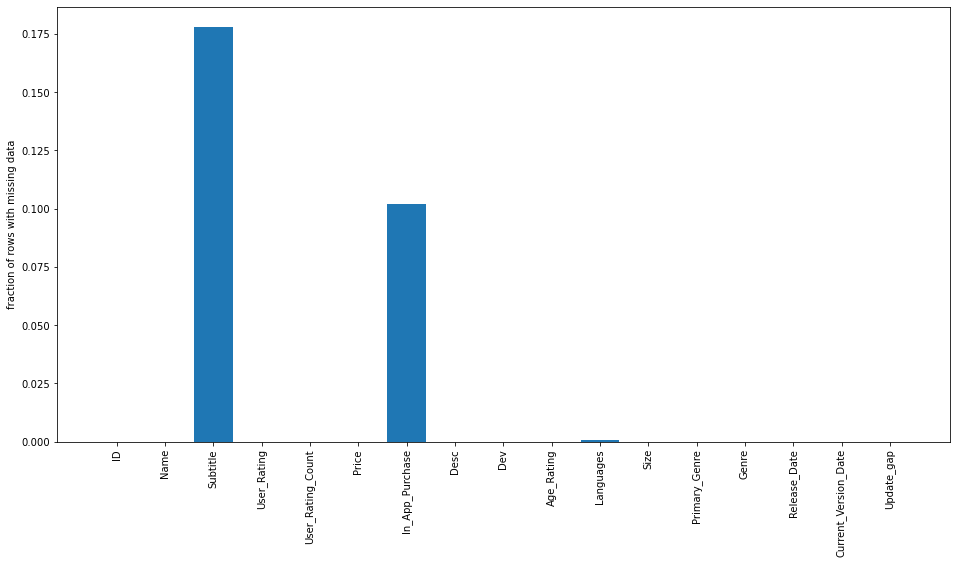

In [8]:
null_counts = gstatf.isnull().sum()/len(gstat)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts)),null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

# Genre segrigation/grouping



In [9]:
gstatfg = gstatf.copy()

gstatfg['Genre'] = gstatfg['Genre'].str.replace(',', '').str.replace('Games', '').str.replace('Entertainment', '').str.replace('Strategy', '') 

gstatfg['Genre'] = gstatfg['Genre'].str.split(' ').map(lambda x: ' '.join(sorted(x)))

gstatfg['Genre']=gstatfg['Genre'].str.strip()

Non_Main_Genre=gstatfg[~gstatfg.Genre.str.contains('Puzzle') & 
                           ~gstatfg.Genre.str.contains('Action') & 
                           ~gstatfg.Genre.str.contains('Family')& 
                           ~gstatfg.Genre.str.contains('Education')& 
                           ~gstatfg.Genre.str.contains('Family')& 
                           ~gstatfg.Genre.str.contains('Adventure')&
                           ~gstatfg.Genre.str.contains('Board')&
                           ~gstatfg.Genre.str.contains('Role')].index

gstatfg.drop(Non_Main_Genre , inplace=True)

gstatfg.loc[gstatfg['Genre'].str.contains('Puzzle'),'Genre'] = 'Puzzle'
gstatfg.loc[gstatfg['Genre'].str.contains('Board'),'Genre'] = 'Puzzle'
gstatfg.loc[gstatfg['Genre'].str.contains('Action'),'Genre'] = 'Action'
gstatfg.loc[gstatfg['Genre'].str.contains('Adventure'),'Genre'] = 'Adventure'
gstatfg.loc[gstatfg['Genre'].str.contains('Role'),'Genre'] = 'Adventure'
gstatfg.loc[gstatfg['Genre'].str.contains('Family'),'Genre'] = 'Family'
gstatfg.loc[gstatfg['Genre'].str.contains('Education'),'Genre'] = 'Family'
    
    



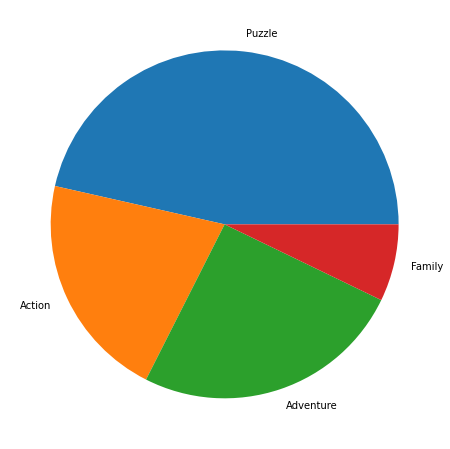

In [10]:
NG = [gstatfg.Genre[(gstatfg['Genre']=='Puzzle')].count(),gstatfg.Genre[(gstatfg['Genre']=='Action')].count(),
     gstatfg.Genre[(gstatfg['Genre']=='Adventure')].count(),gstatfg.Genre[(gstatfg['Genre']=='Family')].count()]
G = ['Puzzle','Action','Adventure','Family']

plt.figure(figsize=(8,8))
plt.pie(NG, labels=G)
plt.show()


Puzzle 1523
Action 691
Adventure 829
Family 235


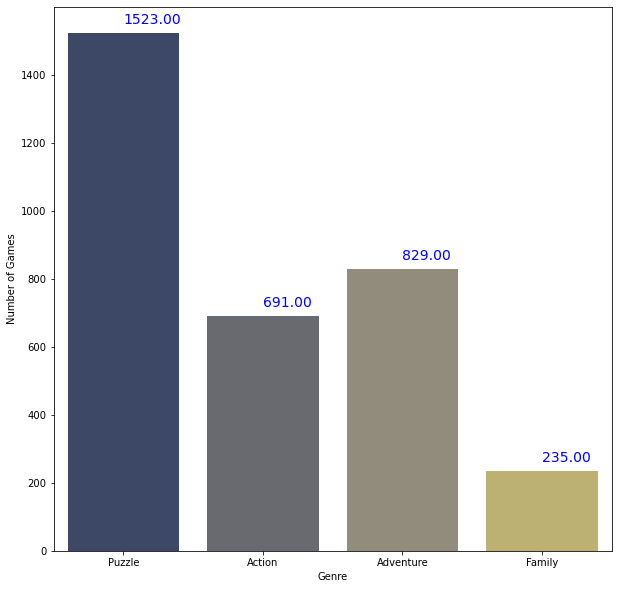

In [11]:
axes = plt.subplots (figsize=(10,10))

#Histogram
x=['Puzzle','Action','Adventure','Family']
y = [gstatfg.Genre[(gstatfg['Genre']=='Puzzle')].count(),gstatfg.Genre[(gstatfg['Genre']=='Action')].count(),
     gstatfg.Genre[(gstatfg['Genre']=='Adventure')].count(),gstatfg.Genre[(gstatfg['Genre']=='Family')].count()]

for i in range(len(x)):
    print(x[i],y[i])


vis1= sns.barplot(x,y,palette='cividis')
vis1.set(xlabel='Genre',ylabel='Number of Games')

for p in vis1.patches:
             vis1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='left', va='top', fontsize=14, color='blue', xytext=(0, 20),
                 textcoords='offset points')

plt.show()

From above result we can infer this: Puzzle > Adventure > Action > Family

Puzzle 4.041365725541694
Action 4.2178002894356
Adventure 4.147165259348613
Family 4.236170212765957


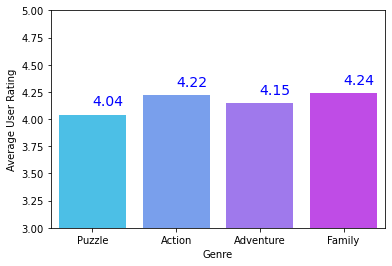

<Figure size 864x576 with 0 Axes>

In [12]:
x=['Puzzle','Action','Adventure','Family']
y = [gstatfg.User_Rating[(gstatfg['Genre']=='Puzzle')].mean(),
     gstatfg.User_Rating[(gstatfg['Genre']=='Action')].mean(),
     gstatfg.User_Rating[(gstatfg['Genre']=='Adventure')].mean(),
     gstatfg.User_Rating[(gstatfg['Genre']=='Family')].mean()]

vis1= sns.barplot(x,y,palette='cool')
vis1.set(xlabel='Genre',ylabel='Average User Rating')
vis1.set(ylim=(3,5))

for i in range(len(x)):
    print(x[i],y[i])

for p in vis1.patches:
             vis1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='left', va='top', fontsize=14, color='blue', xytext=(0, 20),
                 textcoords='offset points')

plt.figure(figsize=(12,8))
        
plt.show()


From Above plot we infer that :- plot shows action and family games have slightly higher User Rating compared to puzzle and adventure games

# Game Size analysis

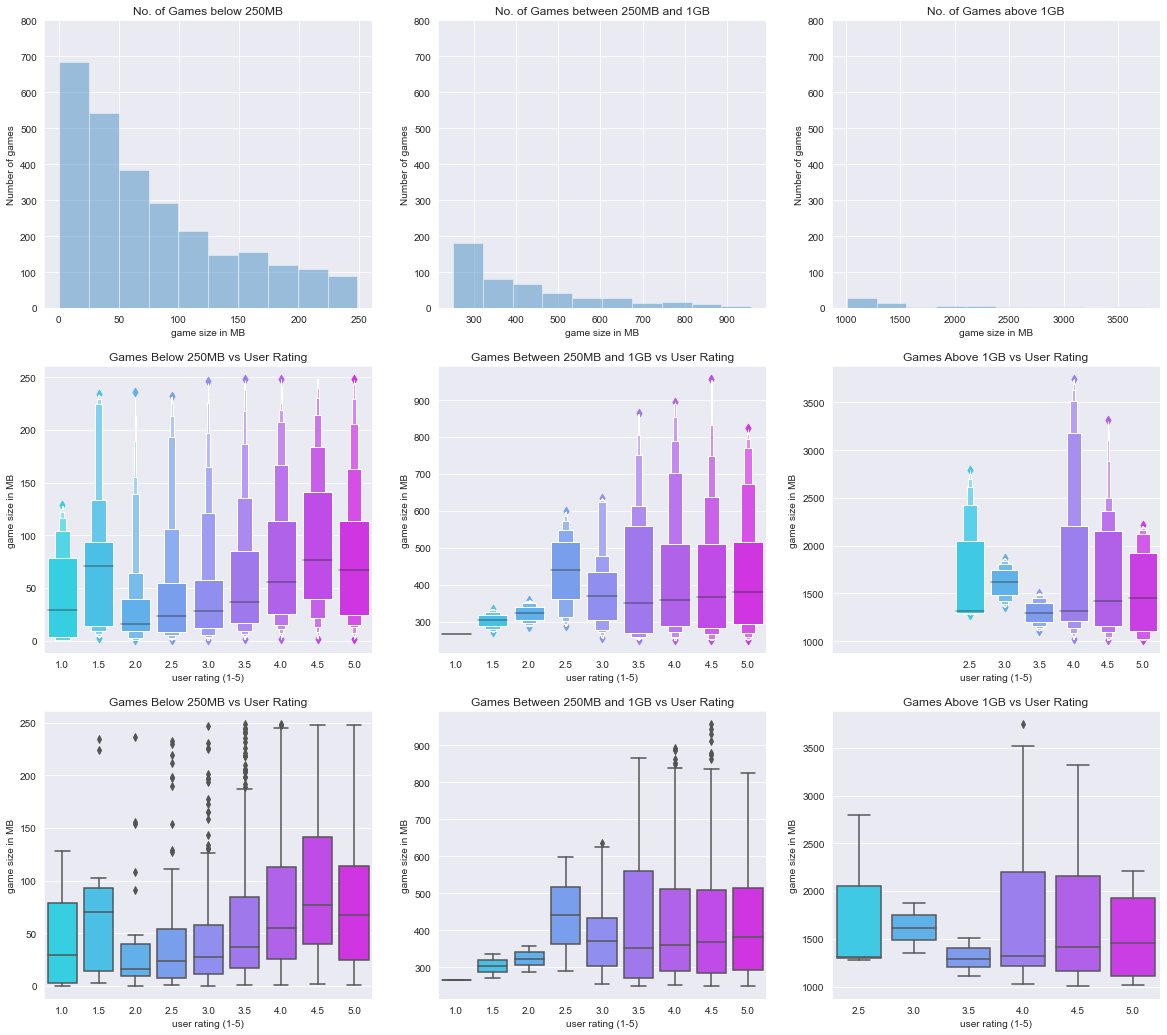

In [13]:
gstatfg['Size2'] = round(gstatfg['Size']/1000000,1)
Size_L250MB = gstatfg[gstatfg.Size2 <250]
Size_M250MB = gstatfg[(gstatfg.Size2 >=250) & (gstatfg.Size2 <1000)]
Size_M1GB = gstatfg[gstatfg.Size2 >=1000]


sns.set_style('darkgrid')

f, axes = plt.subplots(3,3, figsize=(20,18))

# sns.catplot( x = 'User_Rating', y = 'Size2', data=gstatfg,kind='strip')

vis1 = sns.boxenplot( data = Size_L250MB, x = 'User_Rating', y = 'Size2',  ax=axes[1,0],palette='cool')
vis2 = sns.boxenplot( data = Size_M250MB, x = 'User_Rating', y = 'Size2', ax=axes[1,1],palette='cool')
vis3 = sns.boxenplot( data = Size_M1GB, x = 'User_Rating', y = 'Size2', ax=axes[1,2],palette='cool')

vis4 = sns.distplot(Size_L250MB.Size2, bins= 10, kde=False,ax=axes[0,0])
vis5 = sns.distplot(Size_M250MB.Size2, bins= 10, kde=False,ax=axes[0,1])
vis6 = sns.distplot(Size_M1GB.Size2, bins= 10, kde=False,ax=axes[0,2])

vis7 = sns.boxplot( data = Size_L250MB, x = 'User_Rating', y = 'Size2',  ax=axes[2,0],palette='cool')
vis8 = sns.boxplot( data = Size_M250MB, x = 'User_Rating', y = 'Size2', ax=axes[2,1],palette='cool')
vis9 = sns.boxplot( data = Size_M1GB, x = 'User_Rating', y = 'Size2', ax=axes[2,2],palette='cool')

vis1.set(xlabel='user rating (1-5)',ylabel='game size in MB')
vis2.set(xlabel='user rating (1-5)',ylabel='game size in MB')
vis3.set(xlabel='user rating (1-5)',ylabel='game size in MB')

vis4.set(xlabel='game size in MB',ylabel='Number of games')
vis5.set(xlabel='game size in MB',ylabel='Number of games')
vis6.set(xlabel='game size in MB',ylabel='Number of games')

vis7.set(xlabel='user rating (1-5)',ylabel='game size in MB')
vis8.set(xlabel='user rating (1-5)',ylabel='game size in MB')
vis9.set(xlabel='user rating (1-5)',ylabel='game size in MB')

axes[0, 0].set_title('No. of Games below 250MB')
axes[0, 1].set_title('No. of Games between 250MB and 1GB')
axes[0, 2].set_title('No. of Games above 1GB')

axes[1, 0].set_title('Games Below 250MB vs User Rating')
axes[1, 1].set_title('Games Between 250MB and 1GB vs User Rating')
axes[1, 2].set_title('Games Above 1GB vs User Rating')

axes[2,0].set_title('Games Below 250MB vs User Rating')
axes[2,1].set_title('Games Between 250MB and 1GB vs User Rating')
axes[2,2].set_title('Games Above 1GB vs User Rating')

vis3.set(xlim=(-4, 5.5))

vis4.set(ylim=(0, 800))
vis5.set(ylim=(0, 800))
vis6.set(ylim=(0, 800))

plt.show()


* From the plots, we can see that most of the game are below 250MB in which to achieve rating 4 and above it, has to be 100MB+.
* Second column of the chart shows that good games (rating >4) have to be 600MB and above
* A very small portion of gamesare above 1GB, in which the minimum score for the game is 2.5. This may be possbile because their attachment for these games.


In [14]:
# gstatfg['Size2'] = round(gstatfg['Size']/1000000,1)
# Size_L250MB = gstatfg[gstatfg.Size2 <250]
# Size_M250MB = gstatfg[(gstatfg.Size2 >=250) & (gstatfg.Size2 <1000)]
# Size_M1GB = gstatfg[gstatfg.Size2 >=1000]


# sns.set_style('darkgrid')


# f, axes = plt.subplots(1,3, figsize=(10,20))

# vis1 = sns.distplot(Size_L250MB.Size2, bins= 10, kde=False,ax=axes[0])
# vis2 = sns.distplot(Size_M250MB.Size2, bins= 10, kde=False,ax=axes[1])
# vis3 = sns.distplot(Size_M1GB.Size2, bins= 10, kde=False,ax=axes[2])

# vis1.set(xlabel='game size in MB',ylabel='Number of games')
# vis2.set(xlabel='game size in MB',ylabel='Number of games')
# vis3.set(xlabel='game size in MB',ylabel='Number of games')

# axes[0].set_title('No. of Games below 250MB')
# axes[1].set_title('No. of Games between 250MB and 1GB')
# axes[2].set_title('No. of Games above 1GB')

# vis1.set(ylim=(0, 800))
# vis2.set(ylim=(0, 800))
# vis3.set(ylim=(0, 800))

# plt.show()

In [15]:
# f, axes = plt.subplots(1,3, figsize=(20,14))

# vis1 = sns.boxenplot( data = Size_L250MB, x = 'User_Rating', y = 'Size2',  ax=axes[0],palette='cool')
# vis2 = sns.boxenplot( data = Size_M250MB, x = 'User_Rating', y = 'Size2', ax=axes[1],palette='cool')
# vis3 = sns.boxenplot( data = Size_M1GB, x = 'User_Rating', y = 'Size2', ax=axes[2],palette='cool')

# vis1.set(xlabel='user rating (1-5)',ylabel='game size in MB')
# vis2.set(xlabel='user rating (1-5)',ylabel='game size in MB')
# vis3.set(xlabel='user rating (1-5)',ylabel='game size in MB')

# axes[0].set_title('Games Below 250MB vs User Rating')
# axes[1].set_title('Games Between 250MB and 1GB vs User Rating')
# axes[2].set_title('Games Above 1GB vs User Rating')

# plt.show()

In [16]:
# f, axes = plt.subplots(1,3, figsize=(20,14))

# vis1 = sns.boxplot( data = Size_L250MB, x = 'User_Rating', y = 'Size2',  ax=axes[0],palette='cool')
# vis2 = sns.boxplot( data = Size_M250MB, x = 'User_Rating', y = 'Size2', ax=axes[1],palette='cool')
# vis3 = sns.boxplot( data = Size_M1GB, x = 'User_Rating', y = 'Size2', ax=axes[2],palette='cool')

# vis1.set(xlabel='user rating (1-5)',ylabel='game size in MB')
# vis2.set(xlabel='user rating (1-5)',ylabel='game size in MB')
# vis3.set(xlabel='user rating (1-5)',ylabel='game size in MB')

# axes[0].set_title('Games Below 250MB vs User Rating')
# axes[1].set_title('Games Between 250MB and 1GB vs User Rating')
# axes[2].set_title('Games Above 1GB vs User Rating')

# plt.show()

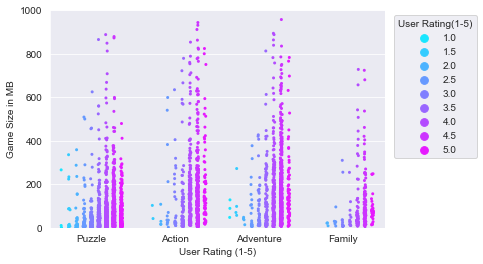

<Figure size 864x720 with 0 Axes>

In [17]:
vis1= sns.stripplot(y='Size2' , x='Genre', data=gstatfg,
                hue='User_Rating',dodge=True, size=3,palette='cool')

plt.legend(title='User Rating(1-5)',bbox_to_anchor=(1.29, 1))

vis1.set(ylim=(0, 1000))
vis1.set(xlabel='User Rating (1-5)',ylabel='Game Size in MB')

plt.figure(figsize=(12,10))

plt.show()


* Puzzle games are less saturated above 400MB to achieve ratng 4.0 and above
* Action & Adventure Genre games are less saturated above 600MB to achieve score 4.0 and above

* For simpler games focus on size between 100MB to 150MB of contents
* For more complex games, target a content of 500MB and above



We can say that more than half of the games from these genre gets a rating of 4 and above, in which the majority focuses on size 400MB and below. 

With the exception of Action which still gets good rating up to 600MB, and Adventure game up to 800MB. 

Family (& education) genre has the least number of games in the store, and a 200MB size is sufficient to get rating of 4.0 and above.

# Release date/ Update date factor


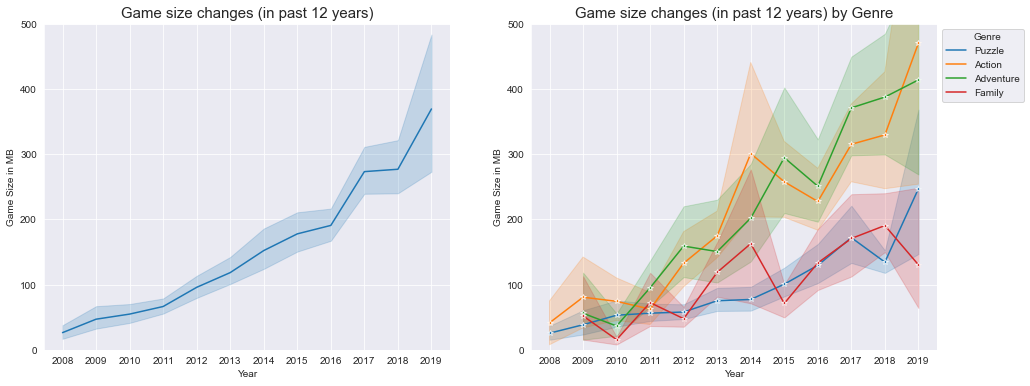

In [18]:
gstatfg['Year'] = gstatfg['Release_Date']
gstatfg['Year']=gstatfg['Year'].astype(str)

for i in (list(gstatfg.index.values)):
    gstatfg['Year'][i]=gstatfg['Year'][i][:4]   #extracting year only
    
g, axes = plt.subplots (1,2, figsize=(16,6))

vis1 = sns.lineplot(x=gstatfg.Year, y=gstatfg.Size2, data=gstatfg, ax=axes[0])
vis1.set(ylim=(0, 500))
vis2 = sns.lineplot(x=gstatfg.Year, y=gstatfg.Size2, hue=gstatfg.Genre, marker='*',ax=axes[1])
vis2.set(ylim=(0, 500))

plt.legend(bbox_to_anchor=(1, 1))

axes[0].set_title('Game size changes (in past 12 years)',fontsize=15)
axes[1].set_title('Game size changes (in past 12 years) by Genre',fontsize=15)

vis1.set(xlabel='Year',ylabel='Game Size in MB')
vis2.set(xlabel='Year',ylabel='Game Size in MB')

plt.show()


From the left graph we can see a almost Linear (rougly 25-30MB per year) increase of game size. 

We can also see that the error margin has increased constantly over the years, this means the size of game is getting bigger and bigger by the years.


We can say that smaller size games are still relatable but at the same time developers challenge market with bigger size games (as big as 3 GB per game)

The right graph shows the growth of game size per game Genre. It is noted that the Game Size fluctuates from year to year, but shows an overall trend of increasing, especially Action Genre which shows a constant growth in the last 5 years

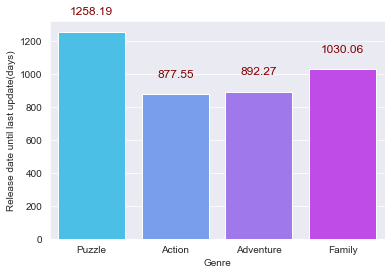

In [19]:
for i in (list(gstatfg.index.values)):
    gstatfg.Update_gap[i]=gstatf.Update_gap[i].days

x=['Puzzle','Action','Adventure','Family']
y = [gstatfg.Update_gap[(gstatfg['Genre']=='Puzzle')].mean(),
     gstatfg.Update_gap[(gstatfg['Genre']=='Action')].mean(),
     gstatfg.Update_gap[(gstatfg['Genre']=='Adventure')].mean(),
     gstatfg.Update_gap[(gstatfg['Genre']=='Family')].mean()]

vis1= sns.barplot(x,y,palette='cool')
vis1.set(xlabel='Genre',ylabel='Release date until last update(days)')

for p in vis1.patches:
             vis1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='maroon', xytext=(0, 20),
                 textcoords='offset points')


This chart provides us the insight that on average, Action and Adventure games has more recent updates compared to Puzzle and Family games. new content are required for Action and Adventure games more often than Puzzle and Family genre.

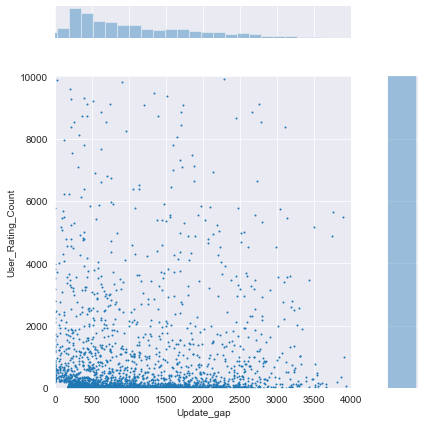

In [20]:
sns.jointplot(x='Update_gap',y='User_Rating_Count',data=gstatfg,kind='scatter',space=1.2,xlim=(0,4000),ylim=(0,1e4),s=1)

    we cannot comment on number of downloads but we can infer that more rating means more download. From the plot above, we are able to say there are more User Rating count (==number of downloads) if the developer provides a more recent update for it(update gap is less).

For making analysis for the In_App_Purchase we will NA values to be zero as it's not sure that we can replace NA with of same Weightage.

# Game Price and In-App Purchase Factor (Grouped by Genre)

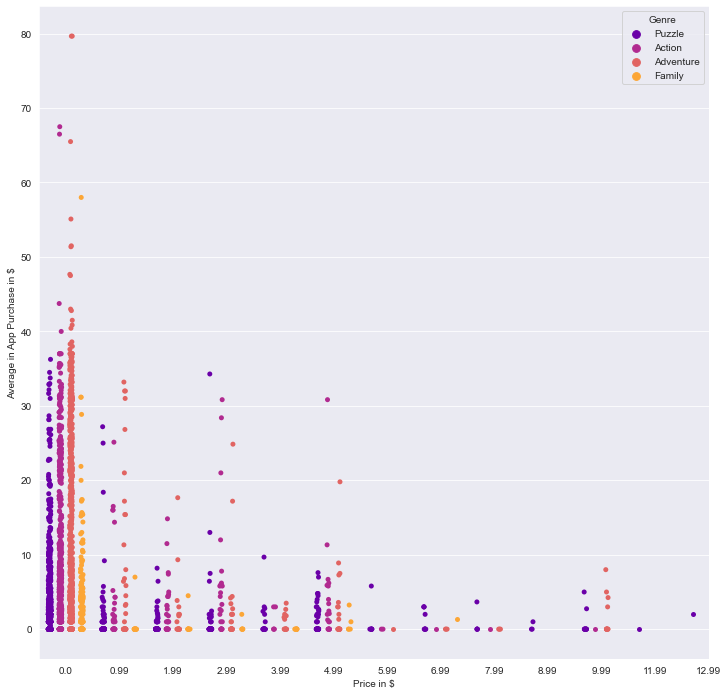

In [21]:
gstatfg2=gstatfg.copy()

gstatfg2['In_App_Purchase'] = gstatfg2['In_App_Purchase'].str.replace(',', '') 
gstatfg2.In_App_Purchase=gstatfg2.In_App_Purchase.fillna(0)

plt.figure(figsize=(12,12))

for i in (list(gstatfg2.index.values)):
    
    if gstatfg2.In_App_Purchase[i] ==0:
        gstatfg2['In_App_Purchase'][i]=0.001
    elif gstatfg2.In_App_Purchase[i] !=0:
        A=str.split(gstatfg2.In_App_Purchase[i])
        A=[float(i) for i in A]
        gstatfg2['In_App_Purchase'][i]=statistics.mean(A)

vis1= sns.stripplot(y=gstatfg2.In_App_Purchase , x=gstatfg2.Price, data=gstatfg2, 
                    hue=gstatfg2.Genre, palette='plasma' ,dodge=True, size=5)

vis1.set(xlabel='Price in $',ylabel='Average in App Purchase in $')
vis1.set(xlim=(-0.5, 12))
plt.show()


In [22]:
# sns.jointplot(y=gstatfg2.In_App_Purchase , x=gstatfg2.Price, data=gstatfg2, 
#                     kind='hex',ylim=(0,50))

The pricier the game gets, the lower the In-App Purchase items are. (may be due to marketing strategy)

It is possible that low price and free games needs some sort of income source to sustain themselves in the market.

Text(0, 0.5, 'Count')

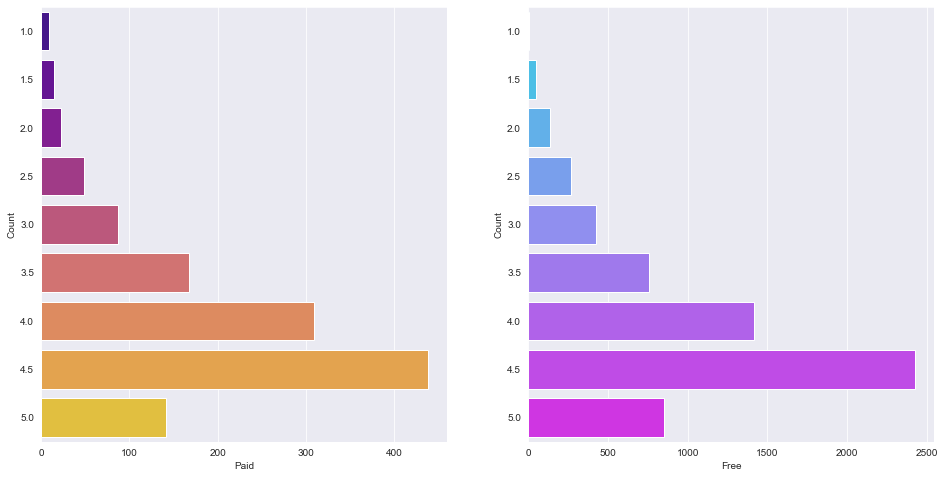

In [23]:
paid = gstat[gstat['Price']>0]
free = gstat[gstat['Price']==0]
fig, ax = plt.subplots(1,2,figsize=(16,8))
sns.countplot(data=paid, y='Average User Rating',ax=ax[0],palette='plasma')
ax[0].set_xlabel('Paid')
ax[0].set_ylabel('Count')

sns.countplot(data=free, y= 'Average User Rating',ax=ax[1],palette='cool')
ax[1].set_xlabel('Free')
ax[1].set_ylabel('Count')


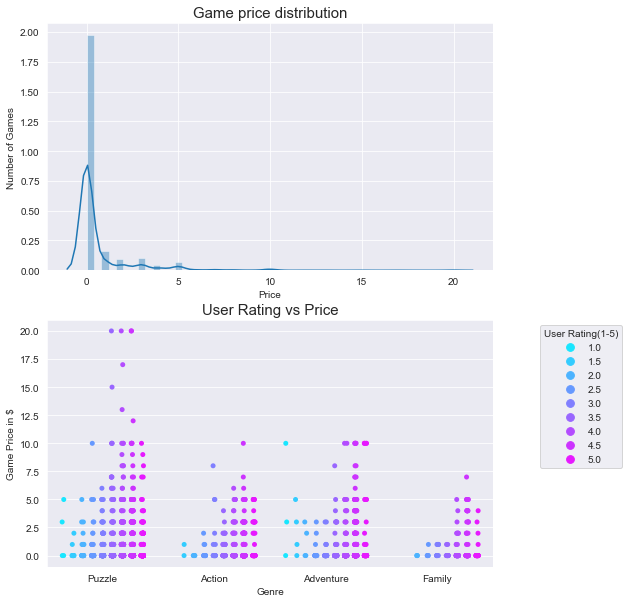

In [24]:
h, axes = plt.subplots (2,1, figsize=(8,10))

vis1 = sns.distplot(gstatfg.Price,kde=True,ax=axes[0])
vis2 = sns.stripplot(y=gstatfg.Price, x=gstatfg.Genre,
                     data=gstatfg,ax=axes[1],hue=gstatfg.User_Rating, 
                     dodge=1,palette='cool')

vis1.set(xlabel='Price',ylabel='Number of Games')
vis2.set(xlabel='Genre',ylabel='Game Price in $')

axes[0].set_title('Game price distribution',fontsize=15)
axes[1].set_title('User Rating vs Price',fontsize=15)
plt.legend(title='User Rating(1-5)',bbox_to_anchor=(1.3, 1))

plt.show()


* Most of the developers(around 85-90%) focuses on games below 1 Dollar and use In-App Purchase as their strategy for income


The trend of user rating with respect to price becomes better as the game becomes more costly.


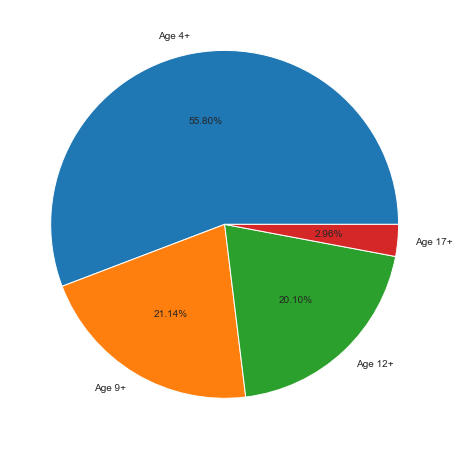

In [25]:
NAR = [gstatfg2.Age_Rating[(gstatfg2['Age_Rating']=='4+')].count(),gstatfg2.Age_Rating[(gstatfg2['Age_Rating']=='9+')].count(),
     gstatfg2.Age_Rating[(gstatfg2['Age_Rating']=='12+')].count(),gstatfg2.Age_Rating[(gstatfg2['Age_Rating']=='17+')].count()]

AR = ['Age 4+','Age 9+','Age 12+','Age 17+']

plt.figure(figsize=(12,8))

plt.pie(NAR, labels=AR, autopct='%.2f%%')
plt.show()

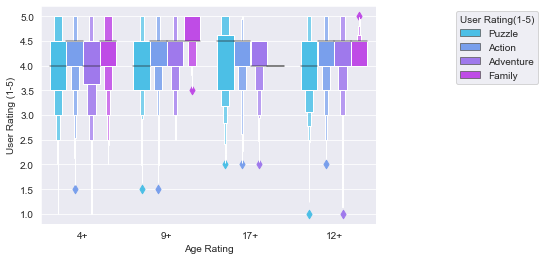

In [26]:
vis1 = sns.boxenplot(x=gstatfg2.Age_Rating, y=gstatfg.User_Rating, 
                     data=gstatfg, hue=gstatfg.Genre, palette='cool',
                   dodge=True)


vis1.set(xlabel='Age Rating',ylabel='User Rating (1-5)')
plt.legend(title='User Rating(1-5)',bbox_to_anchor=(1.5, 1))
plt.show()


Conclusions made:

* Puzzle games are less saturated above 400MB to achieve rating 4.0 and above.
* Action & Adventure Genre games are less saturated above 600MB to achieve rating 4.0 and above.

* For simpler games focus on size between 100MB to 150MB.
* For more complex games, target a content of 500MB and above.


* Games above 1GB have fair tendancy to come above 3 rating and above



* On average, the trend shows that the average game size increase of 25-30MB per/year but small size games are still relatable in the store.


* Family/Educational games has less competition overall
* Puzzle and Family games requires less updates on average.


* For cheaper games within the bounds within ( 0-1 dollor ), developer place in app purchase in the games as a strategy of income.



* Paid Games tend to have better reviews espeicially those above 9-10 Dollar scores 4.0 User Rating
